# CS412 - Machine Learning - 2020
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision tree approache
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

**Download the data from Keras. You must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build a decision tree classifier with the scikit library function calls to classify digits in the MNIST dataset.

## Software: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## Submission: 
Fill this notebook and submit this document with a link to #your Colab notebook 
(make sure to include the link obtained from the #share link on top right)


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Read from Keras library.



In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

# Read data 
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

..

In [2]:
# print shape

print(x_train.shape)

print('Data Dimensionality: ')

dimension =x_train.ndim
print(dimension)

(60000, 28, 28)
Data Dimensionality: 
3


In [3]:
x_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_flat.shape

train_dataframe = pd.DataFrame(x_flat)
train_dataframe['label'] = y_train
print(train_dataframe.columns)

# print first 5 rows in your dataset
print('Head of Data: ')
train_dataframe.head()

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)
Head of Data: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffle the training data

x_flat = shuffle(x_flat, random_state = 0)
y_train = shuffle(y_train, random_state = 0)

# Split 80-20

x_flat, x_validation, y_train, y_validation = train_test_split(x_flat, y_train, train_size = 0.8, test_size=0.2, random_state = 0)

##5) Train a decision tree classifier on development/train data and do model selection using the validation data

* Train 3 decision tree classifiers with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 2, 5, 10]. 
* Test the 3 models on validation set and choose the best one.
* Plot the train and validation set errors for those 3 settings - on one plot. 


In [5]:
# Train decision tree classifiers
from sklearn import tree

model1 = tree.DecisionTreeClassifier(min_samples_split=2)
model1.fit(x_flat, y_train)

model2 = tree.DecisionTreeClassifier(min_samples_split=5)
model2.fit(x_flat, y_train)

model3 = tree.DecisionTreeClassifier(min_samples_split=10)
model3.fit(x_flat, y_train)

# Evaluate on validation set
from sklearn.metrics import accuracy_score

pred1 = model1.predict(x_validation)
accuracy1 = accuracy_score(pred1, y_validation)

pred2 = model2.predict(x_validation)
accuracy2 = accuracy_score(pred2, y_validation)

pred3 = model3.predict(x_validation)
accuracy3 = accuracy_score(pred3, y_validation)

print("Model 1's accuracy is", accuracy1)
print("Model 2's accuracy is", accuracy2)
print("Model 3's accuracy is", accuracy3)


Model 1's accuracy is 0.86375
Model 2's accuracy is 0.8633333333333333
Model 3's accuracy is 0.8595


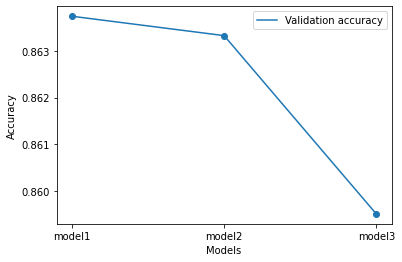

In [6]:
# Plot errors
import matplotlib.pyplot as plt
x_axis = ['model1', 'model2', 'model3']
val_acc = [accuracy1, accuracy2, accuracy3]
#train_acc = [pred1, pred2, pred3]
plt.scatter(x_axis, val_acc)
#plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation accuracy")
#plt.plot(x_axis, train_acc, label = "Train accuracy")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- Predict the labels of testing data **using the best chosen SINGLE model out of the models that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [7]:
# Load test data
#We have load the test data in the 1st part. Now we are going to use it after reshaping x_test like we reshaped x_train.
#x_test reshape

x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
x_test_reshaped.shape

test_dataframe = pd.DataFrame(x_test_reshaped)
test_dataframe['label'] = y_test


# test prediction using a decision tree with all default parameters and ..... min-split value 

#Model1 has given the biggest accuracy score. Now we will use it

test_pred = model1.predict(x_test_reshaped)
accuracy_test = accuracy_score(test_pred, y_test)

# Report your accuracy
print("Model was the best model with the highest accuracy score when tried with training data.")

print("Accuracy of the model1 with the test data: ", accuracy_test)


Model was the best model with the highest accuracy score when tried with training data.
Accuracy of the model1 with the test data:  0.8668


##8) Notebook & Report 
The MNIST dataset consists of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. 

We will train and test our machine learning models in this study, and calculate the accuracy score in order to see how well we formed the models.

Data was already splitted to training and testing sets in the source. We only downloaded and read it as image training and labels, image testing and labels data. 

We shaped the image training and image testing data in order to form a dataframe.

We shufled the training data, then split the training data as %80 to be training and %20 to be validation. This validation part was used later to see each model’s success.

3 different decision tree models were created.

>Decision tree models| Min num of samples required to split an internal node| Classification accuracy
>--- | --- | --- 
>Model 1 | 2 | %86.59
>Model 2 | 5 | %86.39
>Model 3 | 10 | %85.95

Model 1 gave the highest accuracy score with the minimum samples required to split an internal node. It has been selected.

We have obtained the best results with the decision tree classifier Model 1 (minimum number of samples required to split=2), giving classification accuracy of 86.92% on test data.
